# Mini Project: Border Crossings and Entry Trends

## Research Question:
Which port of entry experiences the highest traffic?

In [30]:
import pandas as pd
df = pd.read_csv( "s3://ia-340-2025-fall-francis-fyufhmhfyfuy4767546/Border_Crossing_Entry_Data.csv" )
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


# Dataset Documentation:
**Source:** https://catalog.data.gov/dataset/border-crossing-entry-data-683ae
**Description:** Border crossing data from U.S.-Mexico and U.S.-Canada entry points from 1996-2025
**Time Period:** 1996-2025
**Reason for Choice:** Interesting dataset, contains a large amount of understandable data to the researcher, best data to answer to research question 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403857 entries, 0 to 403856
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  403857 non-null  object 
 1   State      403853 non-null  object 
 2   Port Code  403857 non-null  int64  
 3   Border     403857 non-null  object 
 4   Date       403857 non-null  object 
 5   Measure    403857 non-null  object 
 6   Value      403857 non-null  int64  
 7   Latitude   403853 non-null  float64
 8   Longitude  403853 non-null  float64
 9   Point      403853 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.8+ MB


Displaying the types of data in the dataset

In [20]:
df.describe()

,Port Code,Value,Latitude,Longitude
count,403857.000000,4.038570e+05,403853.000000,403853.000000
mean,2445.253124,2.906242e+04,43.960542,-99.707753
std,1204.537165,1.494412e+05,8.154393,18.261587
min,101.000000,0.000000e+00,25.952000,-141.001000
25%,2304.000000,0.000000e+00,42.999000,-114.728000
50%,3012.000000,1.530000e+02,48.122000,-101.628000
75%,3401.000000,3.087000e+03,49.000000,-84.361000
max,3814.000000,4.447374e+06,62.615000,-66.980000


Displaying the descriptive statistics of the dataset

In [21]:
df.isnull().sum()

Port Name    0
State        4
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     4
Longitude    4
Point        4
dtype: int64

Showing the columns that contain missing values within the dataset

In [22]:
df_clean = df.dropna()
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


Dropping the rows with missing values 

In [23]:
duplicates_before = df.duplicated().sum()
print(f"Duplicates before: {duplicates_before}")

df = df.drop_duplicates()

duplicates_after = df.duplicated().sum()
print(f"Duplicates after: {duplicates_after}")


Duplicates before: 10
Duplicates after: 0


In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

df['Port Name'] = df['Port Name'].astype(str)

df['State'] = df['State'].astype(str)


Changing date to datetime format, changing value to numeric, and changing port name and state to strings

In [25]:
invalid_values = df[df['Value'] < 0]
print("Negative Value rows:")
print(invalid_values)

print("Unique Borders:", df['Border'].unique())

expected_measures = [
    'Personal Vehicles', 'Trucks', 'Pedestrians', 'Buses', 
    'Train Passengers', 'Rail Containers Empty'
]
invalid_measures = df[~df['Measure'].isin(expected_measures)]
print("Invalid Measures:")
print(invalid_measures)


Negative Value rows:
Empty DataFrame
Columns: [Port Name, State, Port Code, Border, Date, Measure, Value, Latitude, Longitude, Point]
Index: []
Unique Borders: ['US-Canada Border' 'US-Mexico Border']
Invalid Measures:
          Port Name         State  Port Code            Border Date  \
4           Warroad     Minnesota       3423  US-Canada Border  NaT   
6            Ysleta         Texas       2401  US-Mexico Border  NaT   
9         Wildhorse       Montana       3323  US-Canada Border  NaT   
10          Warroad     Minnesota       3423  US-Canada Border  NaT   
11         Westhope  North Dakota       3419  US-Canada Border  NaT   
...             ...           ...        ...               ...  ...   
403850         Roma         Texas       2310  US-Mexico Border  NaT   
403851      Pembina  North Dakota       3401  US-Canada Border  NaT   
403852       Norton       Vermont        211  US-Canada Border  NaT   
403854  Trout River      New York        715  US-Canada Border  NaT   
4

Verifying the validity of the data and ensuring the numeric range, correct categories, and valid measures

# Process/Aggregate
Adding a new variable

In [26]:
df = df.sort_values(by=['Port Name', 'Measure', 'Date'])

df['Growth_Rate'] = df.groupby(['Port Name', 'Measure'])['Value'].pct_change() * 100

df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Growth_Rate
3155,Alcan,Alaska,3104,US-Canada Border,NaT,Bus Passengers,44,62.615,-141.001,POINT (-141.001444 62.614961),NaN
3983,Alcan,Alaska,3104,US-Canada Border,NaT,Bus Passengers,1,62.615,-141.001,POINT (-141.001444 62.614961),-97.727273
4281,Alcan,Alaska,3104,US-Canada Border,NaT,Bus Passengers,9,62.615,-141.001,POINT (-141.001444 62.614961),800.000000
4327,Alcan,Alaska,3104,US-Canada Border,NaT,Bus Passengers,4511,62.615,-141.001,POINT (-141.001444 62.614961),50022.222222
7784,Alcan,Alaska,3104,US-Canada Border,NaT,Bus Passengers,204,62.615,-141.001,POINT (-141.001444 62.614961),-95.477721


Adding in a new variable titled "Growth_Rate" that shows the % increase or decrease in crossings compared to the previous period. This supports the research question by initially showing which ports of entry are displaying growth year over year. This new variable helps to narrow which ports are getting busier each year to assist the research question.

# Query 
Filter the data to only the year 2024 to display the busiest ports in the most recent complete year and filter out all entry ports under 100,000 crossings monthly. 

In [27]:
import pandas as pd



df_2024 = df[df['Date'].dt.year == 2024]


df_high = df[df['Value'] > 100_000]


df_2024_high = df[
    (df['Date'].dt.year == 2024) &
    (df['Value'] > 100_000)
]

print("=== 2024 Data ===")
display(df_2024.head())

print("=== High Volume (>100,000) ===")
display(df_high.head())

print("=== 2024 & High Volume ===")
display(df_2024_high.head())


=== 2024 Data ===


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Growth_Rate


=== High Volume (>100,000) ===


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Growth_Rate
5646,Alexandria Bay,New York,708,US-Canada Border,NaT,Personal Vehicle Passengers,105110,44.347,-75.984,POINT (-75.983592 44.347229),342.717547
9816,Alexandria Bay,New York,708,US-Canada Border,NaT,Personal Vehicle Passengers,165473,44.347,-75.984,POINT (-75.983592 44.347229),4283.390728
14451,Alexandria Bay,New York,708,US-Canada Border,NaT,Personal Vehicle Passengers,162200,44.347,-75.984,POINT (-75.983592 44.347229),6525.816993
17349,Alexandria Bay,New York,708,US-Canada Border,NaT,Personal Vehicle Passengers,113919,44.347,-75.984,POINT (-75.983592 44.347229),58.978188
29116,Alexandria Bay,New York,708,US-Canada Border,NaT,Personal Vehicle Passengers,123053,44.347,-75.984,POINT (-75.983592 44.347229),235.276007


=== 2024 & High Volume ===


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Growth_Rate


The 2024 ports of entry with high monthly crossings in the year 2024 are shown after filtering out ports with low entry and incomplete and previous years.

## Visualize

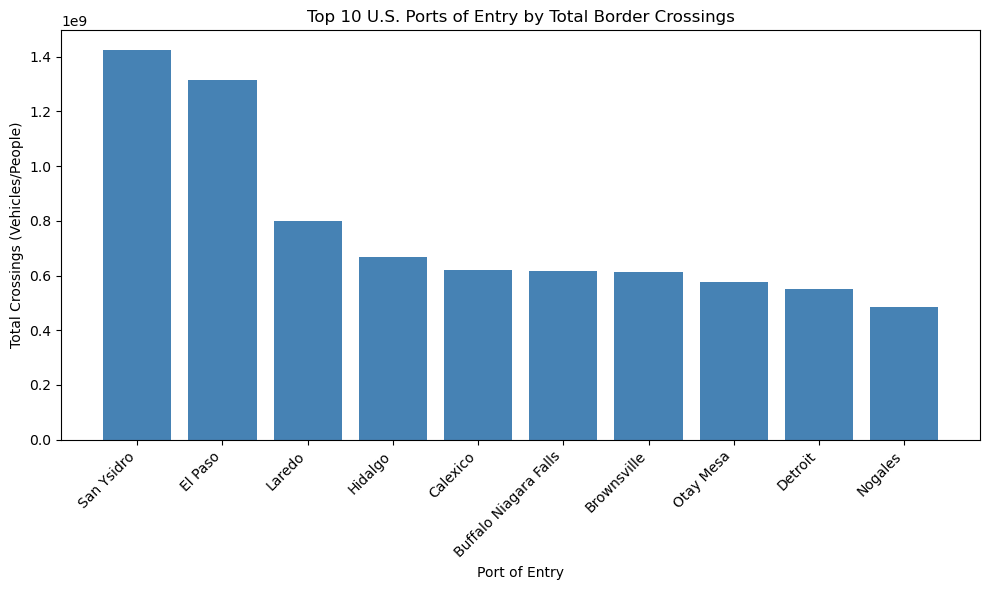

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by port and calculate total crossings
top_ports_total = df.groupby('Port Name')['Value'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_ports_total['Port Name'], top_ports_total['Value'], color='steelblue')
plt.title("Top 10 U.S. Ports of Entry by Total Border Crossings")
plt.xlabel("Port of Entry")
plt.ylabel("Total Crossings (Vehicles/People)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


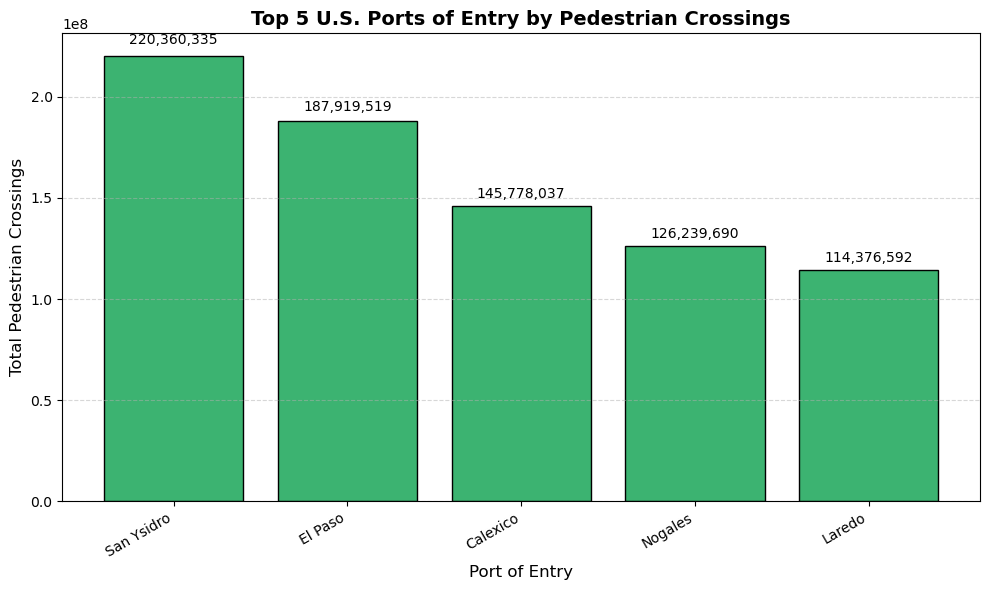

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Clean up data ---
df['Port Name'] = df['Port Name'].str.strip()
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Measure'] = df['Measure'].str.strip()

# --- Filter for pedestrian crossings ---
pedestrian_df = df[df['Measure'].str.contains('Pedestrian', case=False, na=False)]

# --- Find top 5 ports by total pedestrian crossings ---
top5_pedestrian = (
    pedestrian_df.groupby('Port Name')['Value']
    .sum()
    .nlargest(5)
    .reset_index()
)

# --- Plot ---
plt.figure(figsize=(10,6))
bars = plt.bar(top5_pedestrian['Port Name'], top5_pedestrian['Value'],
               color='mediumseagreen', edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (height * 0.02),
             f"{int(height):,}", ha='center', va='bottom', fontsize=10)

# --- Styling ---
plt.title("Top 5 U.S. Ports of Entry by Pedestrian Crossings", fontsize=14, weight='bold')
plt.xlabel("Port of Entry", fontsize=12)
plt.ylabel("Total Pedestrian Crossings", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The top bar graph displays the 10 ports of entry with the total most crossings (including all people and vehicles) and displays that out of the top 10, 8 are along the US-Mexico border. Additionally, the chart displays that the top 5 most crossed ports are all along the US-Mexico border. Further, this graph isolates the San Ysidro port of entry as the number 1 busiest port of entry overall, due to the most crossers above all others. 

The second bar graph displays the top 5 ports of entry with the most pedestrian crossings over the complete dataset, in order to isolate pedestrians from vehicles as a control for evaluating the busiest port of entry. This graph displays San Ysidro as the port most crossed by pedestrians among the entire dataset. These graphs answer the research question of "what port of entry experiences the highest traffic?" and display that throughout time, San Ysidro is the most used port of entry, when including all crossings (individuals and vehicles), and also solely pedestrians. 